# Objective : This is a usecase where we need to predict the insurance fraud  in the Automobile insurance dataset

In [1]:
#importing libraries for visiualizing and understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
fraud_df=pd.read_csv('insurance_fraud.csv')

# Finding insights of the data and what it consist of

In [3]:
fraud_df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
fraud_df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [5]:
#finding the numbers of rows and column
fraud_df.shape

(1000, 40)

In [6]:
#finding the information about the dataset
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
#finding the unique values present in Polict state column and their count
print(fraud_df['policy_state'].unique())
print(fraud_df['policy_state'].value_counts())

['OH' 'IN' 'IL']
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


In [8]:
#finding the unique values present in auto_model column and their count
print(fraud_df['auto_model'].unique())
print(fraud_df['auto_model'].value_counts())

['92x' 'E400' 'RAM' 'Tahoe' 'RSX' '95' 'Pathfinder' 'A5' 'Camry' 'F150'
 'A3' 'Highlander' 'Neon' 'MDX' 'Maxima' 'Legacy' 'TL' 'Impreza'
 'Forrestor' 'Escape' 'Corolla' '3 Series' 'C300' 'Wrangler' 'M5' 'X5'
 'Civic' 'Passat' 'Silverado' 'CRV' '93' 'Accord' 'X6' 'Malibu' 'Fusion'
 'Jetta' 'ML350' 'Ultima' 'Grand Cherokee']
RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
92x               28
Forrestor         28
Camry             28
F150              27
E400              27
95                27
Grand Cherokee    25
93                25
Maxima            24
Tahoe             24
Escape            24
X5                23
Ultima            23
Highlander        22
Civic             22
Silverado         22
Fusion            21
Corolla           20
Impreza           20
ML350             20
CRV               20
TL 

In [9]:
#finding the unique values present in auto_make column and their count
print(fraud_df['auto_make'].unique())
print(fraud_df['auto_make'].value_counts())

['Saab' 'Mercedes' 'Dodge' 'Chevrolet' 'Accura' 'Nissan' 'Audi' 'Toyota'
 'Ford' 'Suburu' 'BMW' 'Jeep' 'Honda' 'Volkswagen']
Suburu        80
Dodge         80
Saab          80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


In [10]:
#finding the unique Gender values present and their count
print(fraud_df['insured_sex'].unique())
print(fraud_df['insured_sex'].value_counts())

['MALE' 'FEMALE']
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


In [11]:
#finding the unique values present in insured_education  and their count
print(fraud_df['insured_education_level'].unique())
print(fraud_df['insured_education_level'].value_counts())

['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


In [12]:
#finding the unique values present in insured_occupation  and their count
print(fraud_df['insured_occupation'].unique())
print(fraud_df['insured_occupation'].value_counts())

['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


In [13]:
#finding the unique values present in insured_hobbies  and their count
print(fraud_df['insured_hobbies'].unique())
print(fraud_df['insured_hobbies'].value_counts())

['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


In [14]:
#finding the unique values present in Incident Severity  and their count
print(fraud_df['incident_severity'].unique())
print(fraud_df['incident_severity'].value_counts())

['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


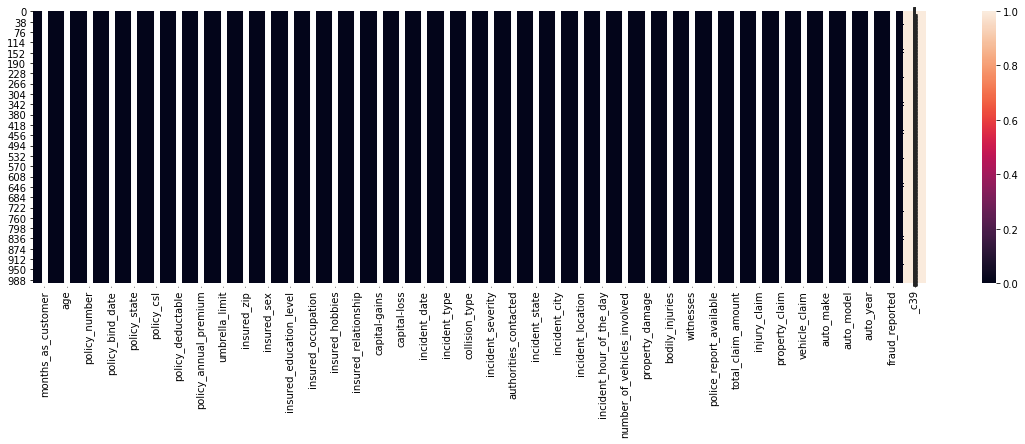

In [15]:
#checking null values
plt.figure(figsize=(20,5))
sns.heatmap(fraud_df.isnull(),annot=True)

In [16]:
fraud_df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [17]:
#dropping c_39 column as it consist of all null values
fraud_df.drop(['_c39'],axis=1,inplace=True)

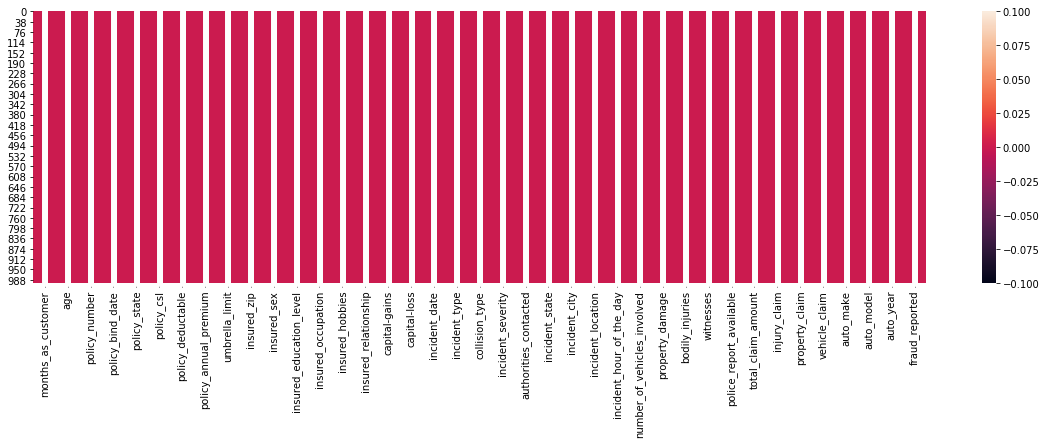

In [18]:
#checking null values
plt.figure(figsize=(20,5))
sns.heatmap(fraud_df.isnull(),annot=True)

In [19]:
fraud_df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [20]:
#hence there are no null values presnet in the datatset

# Bivariate Analysis

Text(0.5, 1.0, 'Count of Fraud Reporteda as yes or no')

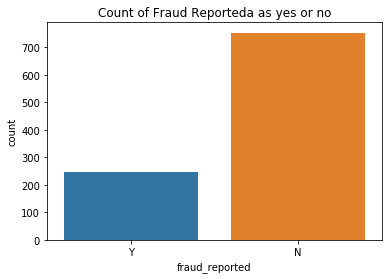

In [21]:
sns.countplot(fraud_df['fraud_reported'])
plt.title('Count of Fraud Reporteda as yes or no')

Text(0.5, 1.0, 'fraud_reported w.r.t Time as Customer')

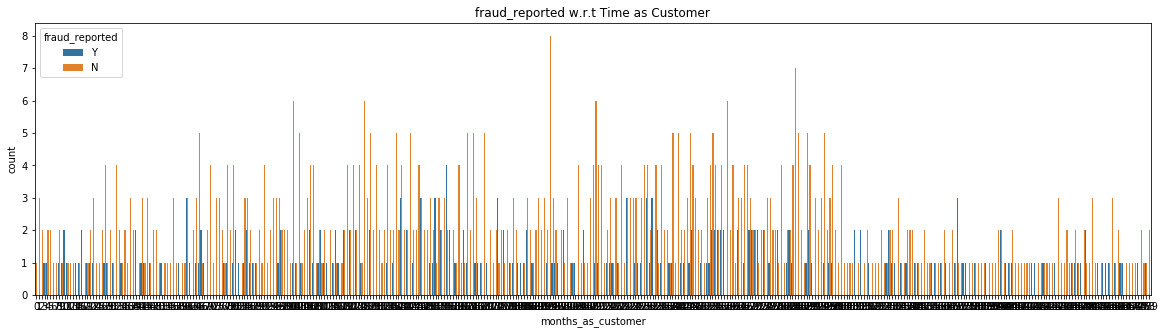

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(fraud_df['months_as_customer'],hue=fraud_df['fraud_reported'],orient='h')
plt.title('fraud_reported w.r.t Time as Customer')

Text(0.5, 1.0, 'fraud_reported w.r.t age')

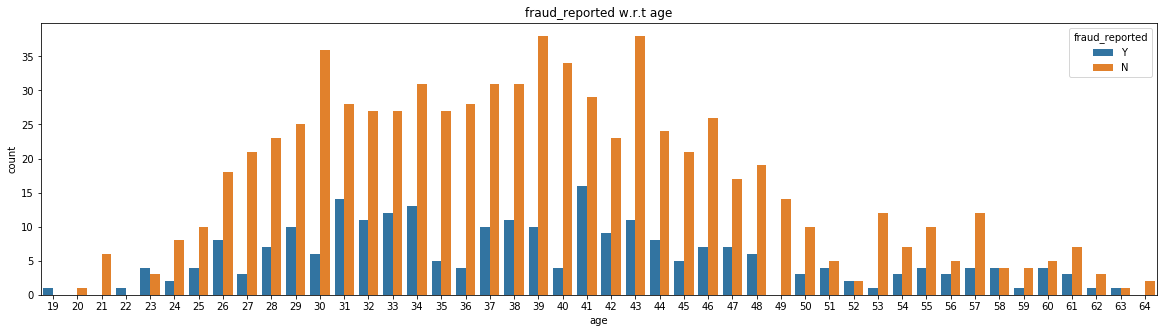

In [23]:
plt.figure(figsize=(20,5))
sns.countplot(fraud_df['age'],hue=fraud_df['fraud_reported'])
plt.title('fraud_reported w.r.t age')

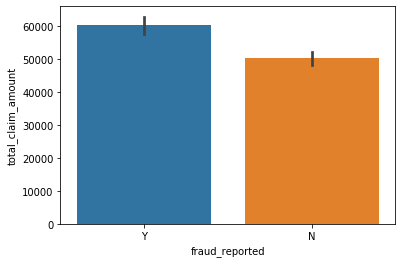

In [24]:
sns.barplot(fraud_df['fraud_reported'],fraud_df['total_claim_amount'])

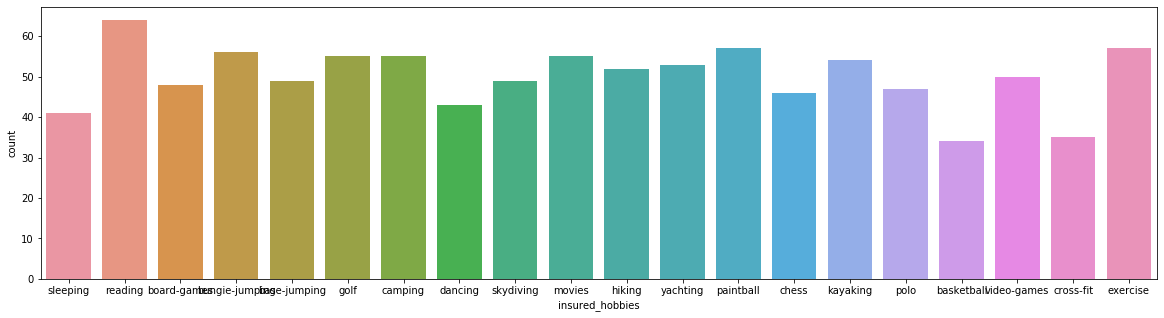

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(fraud_df['insured_hobbies'])

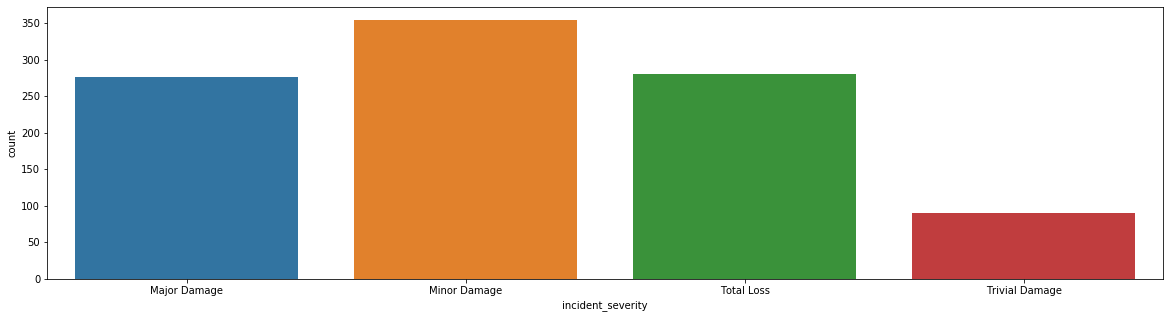

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(fraud_df['incident_severity'])

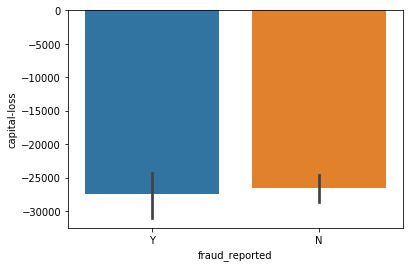

In [27]:
sns.barplot(fraud_df['fraud_reported'],fraud_df['capital-loss'])

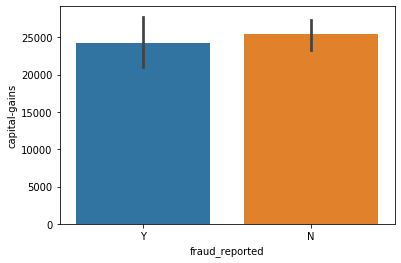

In [28]:
sns.barplot(fraud_df['fraud_reported'],fraud_df['capital-gains'])

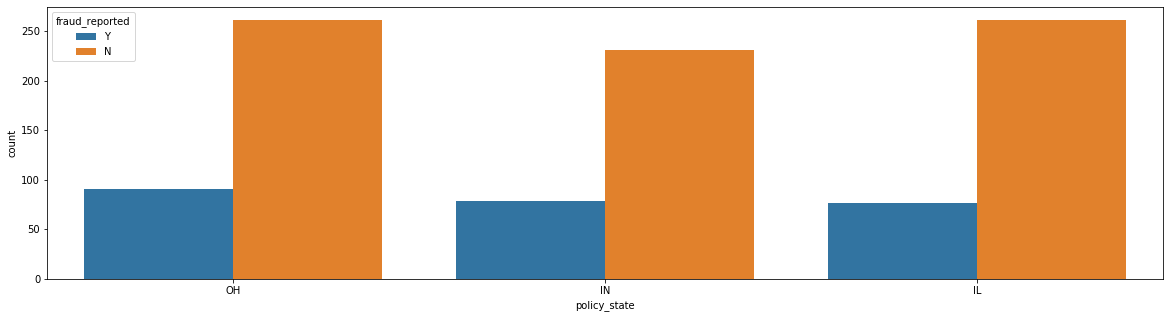

In [29]:
plt.figure(figsize=(20,5))
sns.countplot(fraud_df['policy_state'],hue=fraud_df['fraud_reported'])

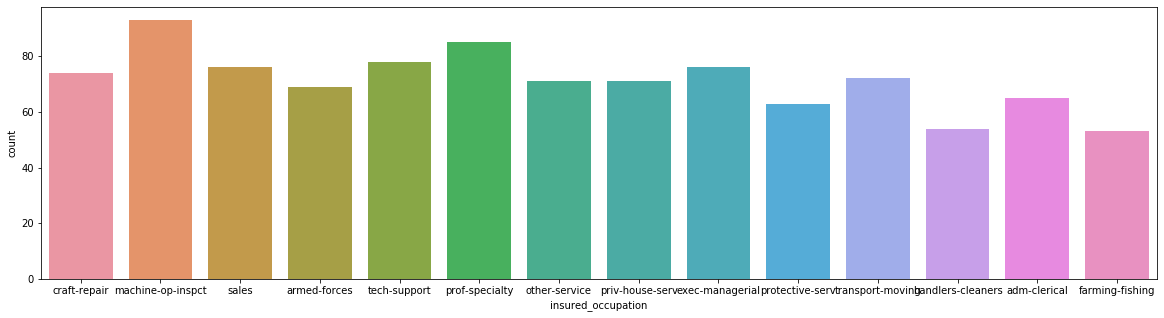

In [30]:
plt.figure(figsize=(20,5))
sns.countplot(fraud_df['insured_occupation'])

In [31]:
#Dropping some columns as they are not required for prediction
fraud_df.drop(['incident_date','authorities_contacted','incident_state','incident_location','incident_hour_of_the_day','policy_csl',
               'policy_bind_date','policy_number','insured_relationship','incident_city','auto_make','auto_model','auto_year','umbrella_limit','insured_zip'],axis=1,inplace=True)

In [32]:
fraud_df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [33]:
fraud_df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,53300,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,0,...,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,35100,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,48900,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,66000,...,1,NO,0,1,NO,6500,1300,650,4550,N


# Changing the categorical column 'values' to numeric 'values' using 'LABEL ENCODER'

In [34]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [35]:
columns=(lb.fit_transform(fraud_df['policy_state']),lb.fit_transform(fraud_df['insured_sex']),lb.fit_transform(fraud_df['insured_education_level']),
        lb.fit_transform(fraud_df['insured_occupation']),lb.fit_transform(fraud_df['insured_hobbies']),lb.fit_transform(fraud_df['incident_type']),
        lb.fit_transform(fraud_df['collision_type']),lb.fit_transform(fraud_df['incident_severity']),
        lb.fit_transform(fraud_df['property_damage']),lb.fit_transform(fraud_df['police_report_available']),lb.fit_transform(fraud_df['fraud_reported']))

In [36]:
fraud_df['policy_state']=columns[0]
fraud_df['insured_sex']=columns[1]
fraud_df['insured_education_level']=columns[2]
fraud_df['insured_occupation']=columns[3]
fraud_df['insured_hobbies']=columns[4]
fraud_df['incident_type']=columns[5]
fraud_df['collision_type']=columns[6]
fraud_df['incident_severity']=columns[7]
fraud_df['property_damage']=columns[8]
fraud_df['police_report_available']=columns[9]
fraud_df['fraud_reported']=columns[10]


In [37]:
fraud_df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,2,1000,1406.91,1,4,2,17,53300,...,1,2,1,2,2,71610,6510,13020,52080,1
1,228,42,1,2000,1197.22,1,4,6,15,0,...,1,0,0,0,0,5070,780,780,3510,1
2,134,29,2,2000,1413.14,0,6,11,2,35100,...,3,1,2,3,1,34650,7700,3850,23100,0
3,256,41,0,2000,1415.74,0,6,1,2,48900,...,1,0,1,2,1,63400,6340,6340,50720,1
4,228,44,0,1000,1583.91,1,0,11,2,66000,...,1,1,0,1,1,6500,1300,650,4550,0


# Univariate  Analysis

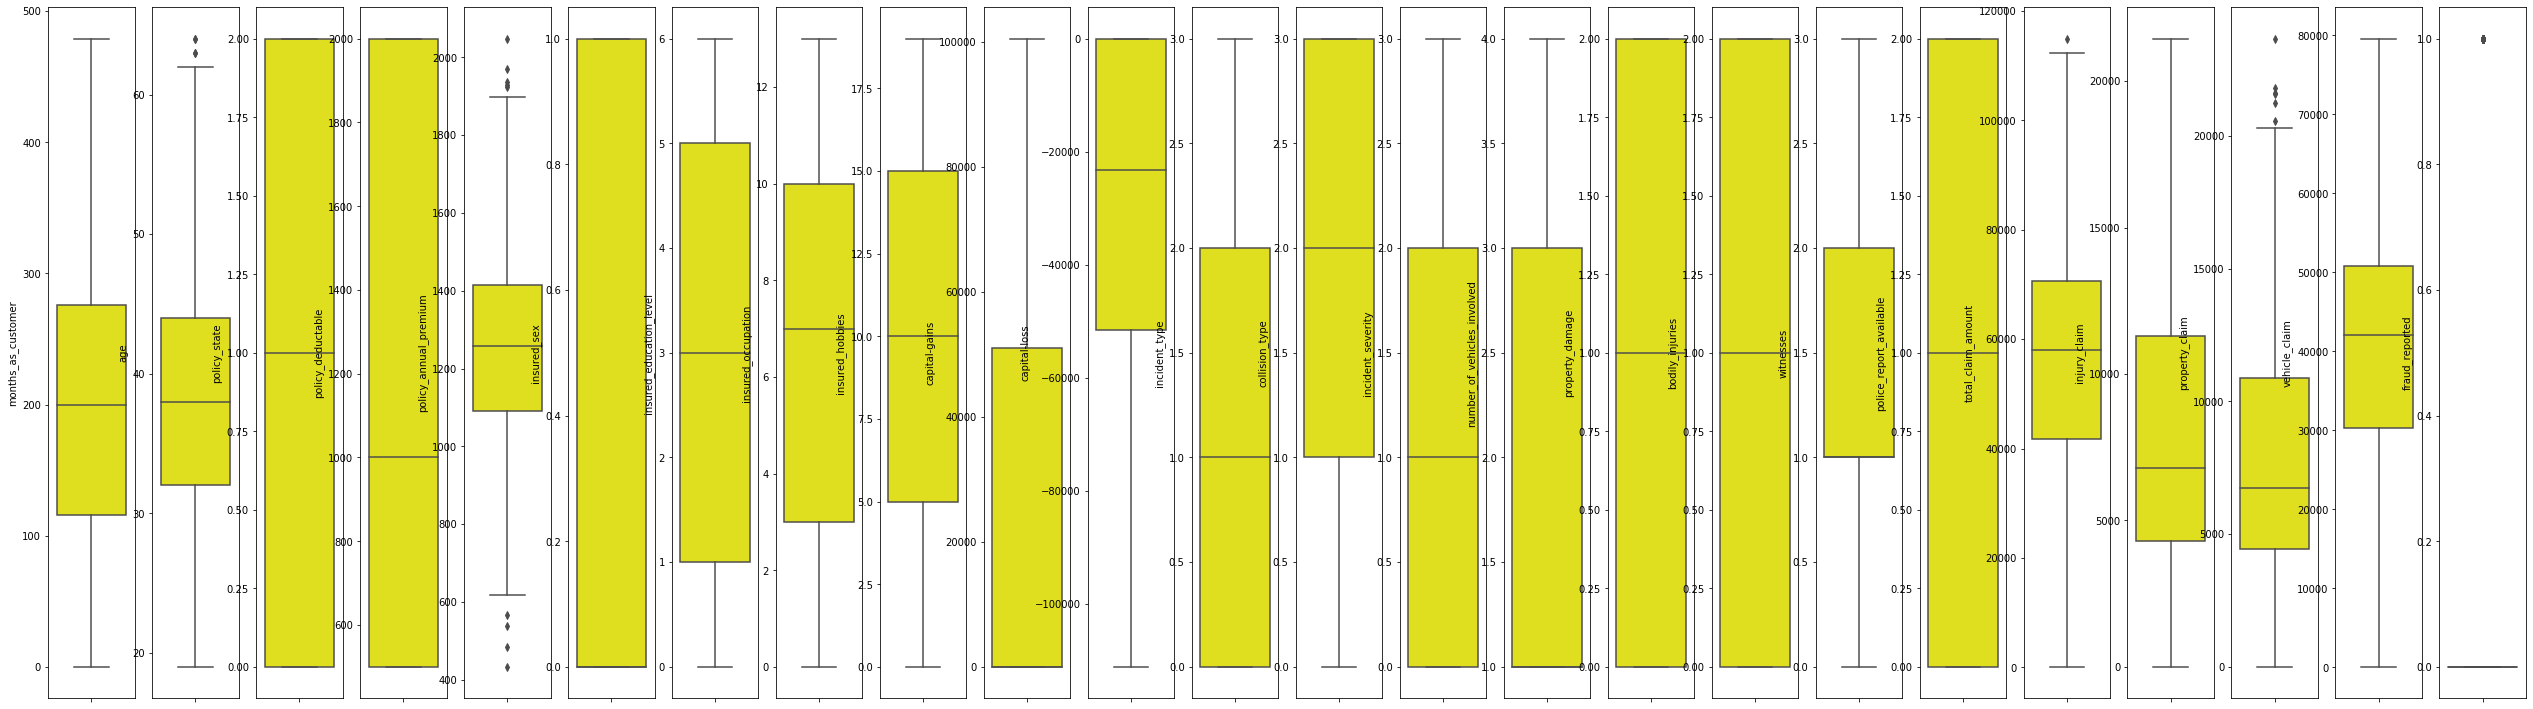

In [38]:
#using boxplot to see outliers and IQR range
collist=fraud_df.columns.values
ncol=27
nrows=10
plt.figure(figsize=(50,150))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(fraud_df[collist[i]],color='yellow',orient='v')

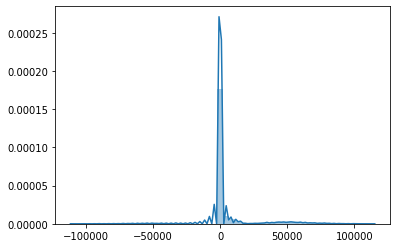

In [39]:
sns.distplot(fraud_df)

# Statistical Analysis

In [40]:
fraud_df.describe()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,1136.000000,1256.406150,0.463000,2.966000,6.653000,9.731000,25126.100000,...,1.83900,0.94200,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,0.247000
std,115.113174,9.140287,0.83096,611.864673,244.167395,0.498879,1.948497,4.019048,5.674049,27872.187708,...,1.01888,0.81197,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,0.431483
min,0.000000,19.000000,0.00000,500.000000,433.330000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.00000,0.00000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000
25%,115.750000,32.000000,0.00000,500.000000,1089.607500,0.000000,1.000000,3.000000,5.000000,0.000000,...,1.00000,0.00000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,0.000000
50%,199.500000,38.000000,1.00000,1000.000000,1257.200000,0.000000,3.000000,7.000000,10.000000,0.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,0.000000
75%,276.250000,44.000000,2.00000,2000.000000,1415.695000,1.000000,5.000000,10.000000,15.000000,51025.000000,...,3.00000,2.00000,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,0.000000
max,479.000000,64.000000,2.00000,2000.000000,2047.590000,1.000000,6.000000,13.000000,19.000000,100500.000000,...,4.00000,2.00000,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,1.000000


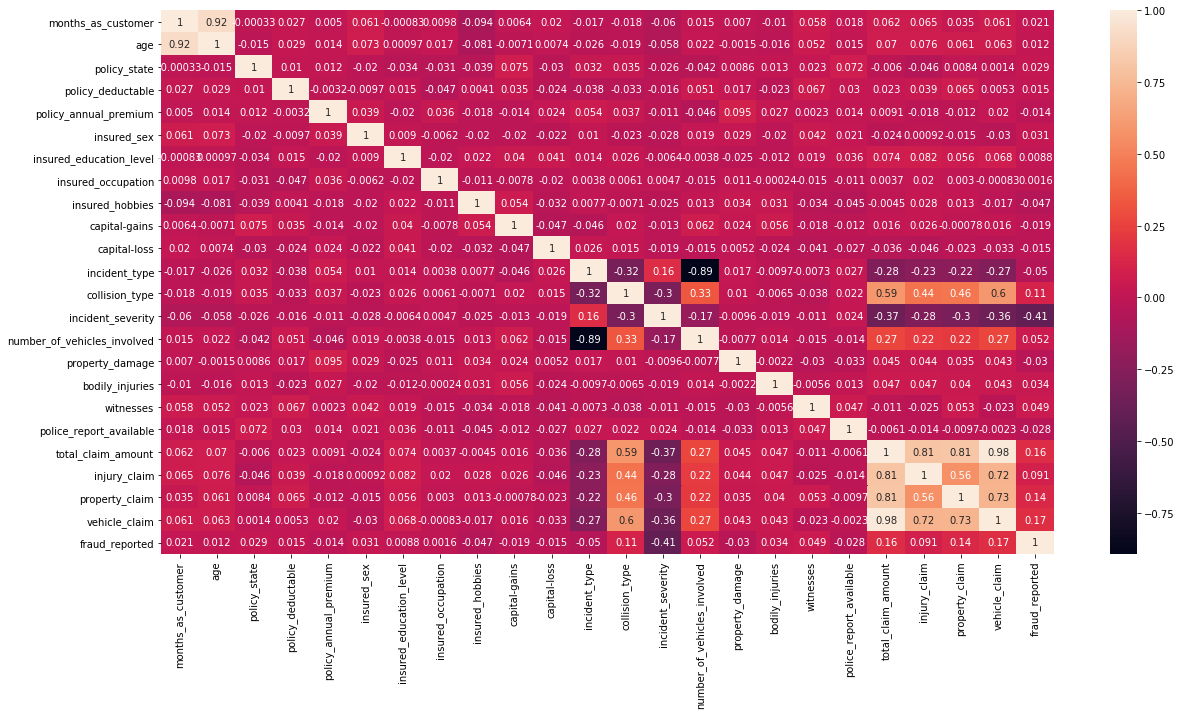

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(fraud_df.corr(),annot=True)

In [42]:
fraud_df.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,0.026807,0.005018,0.060925,-0.000833,0.009814,-0.093661,0.006399,...,0.014736,0.007040,-0.010162,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.020544
age,0.922098,1.000000,-0.014533,0.029188,0.014404,0.073337,0.000969,0.017220,-0.081315,-0.007075,...,0.022102,-0.001486,-0.015679,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.010033,0.012455,-0.020481,-0.034327,-0.031215,-0.038689,0.074551,...,-0.042263,0.008623,0.013384,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.029432
policy_deductable,0.026807,0.029188,0.010033,1.000000,-0.003245,-0.009733,0.015217,-0.046733,0.004061,0.035212,...,0.051214,0.016900,-0.022765,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,-0.003245,1.000000,0.038853,-0.019715,0.035922,-0.018019,-0.013738,...,-0.045991,0.095359,0.026780,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,-0.014480
insured_sex,0.060925,0.073337,-0.020481,-0.009733,0.038853,1.000000,0.009002,-0.006160,-0.020317,-0.020494,...,0.018793,0.029293,-0.020297,0.042463,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.015217,-0.019715,0.009002,1.000000,-0.020298,0.021807,0.039912,...,-0.003768,-0.025290,-0.012072,0.019211,0.036141,0.074226,0.081880,0.055794,0.068348,0.008808
insured_occupation,0.009814,0.017220,-0.031215,-0.046733,0.035922,-0.006160,-0.020298,1.000000,-0.011077,-0.007824,...,-0.015368,0.010697,-0.000236,-0.014794,-0.011083,0.003692,0.020211,0.003004,-0.000829,0.001564
insured_hobbies,-0.093661,-0.081315,-0.038689,0.004061,-0.018019,-0.020317,0.021807,-0.011077,1.000000,0.054338,...,0.012586,0.033763,0.031373,-0.033971,-0.045452,-0.004488,0.028393,0.012535,-0.016814,-0.046838
capital-gains,0.006399,-0.007075,0.074551,0.035212,-0.013738,-0.020494,0.039912,-0.007824,0.054338,1.000000,...,0.061643,0.023921,0.055829,-0.017651,-0.012237,0.015980,0.025934,-0.000779,0.015836,-0.019173


In [43]:
#cheking the skewness
fraud_df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.052967
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
fraud_reported                 1.175051
dtype: float64

# Removing outliers and skewness from the dataset

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(fraud_df))
print(z)

[[1.07813958 0.99083647 1.18717314 ... 1.16550497 0.74965272 1.74601919]
 [0.2089946  0.33407345 0.01685641 ... 1.37269599 1.82334593 1.74601919]
 [0.60800168 1.08891308 1.18717314 ... 0.73607206 0.78556451 0.57273139]
 ...
 [0.64276748 0.54161057 1.18717314 ... 0.0208261  0.77190224 0.57273139]
 [2.20802805 2.52328351 1.22088596 ... 0.45197603 0.07357971 0.57273139]
 [2.19064515 2.3043625  1.18717314 ... 1.34366428 1.81434017 0.57273139]]


In [45]:
threhold=3

In [46]:
print(np.where(z>3))#printing all the value position which are greater than the threshold value

(array([229, 248, 500, 763, 807], dtype=int64), array([ 4,  4, 21,  4, 10], dtype=int64))


In [47]:
z[31][5]#checking the above output result

1.0769527444706635

In [48]:
fraud_new=fraud_df[(z<3).all(axis=1)] #removing the outliers

In [49]:
print("Shape of the dataset before removing outliers",fraud_df.shape)
print("\n \n")
print("Shape of the dataset after removing the outliers",fraud_new.shape)

Shape of the dataset before removing outliers (1000, 24)

 

Shape of the dataset after removing the outliers (995, 24)


In [63]:
#we are left with only 995 rows in the dataset

In [64]:
#cheking skewness after removing outliers
fraud_new.skew()

months_as_customer             0.358958
age                            0.473974
policy_state                  -0.028196
policy_deductable              0.475849
policy_annual_premium          0.033107
insured_sex                    0.143294
insured_education_level        0.001403
insured_occupation            -0.061818
insured_hobbies               -0.061489
capital-gains                  0.479472
capital-loss                  -0.379708
incident_type                  0.101056
collision_type                -0.193075
incident_severity              0.274925
number_of_vehicles_involved    0.503045
property_damage                0.099513
bodily_injuries                0.012979
witnesses                      0.027371
police_report_available        0.055082
total_claim_amount            -0.591848
injury_claim                   0.270253
property_claim                 0.359528
vehicle_claim                 -0.618189
fraud_reported                 1.173586
dtype: float64

In [65]:
#removing the Skewness
collist=fraud_new.columns.values
for i in range(0,len(collist)):
    if fraud_new.skew().loc[collist[i]]>0.55:
        fraud_new[collist[i]]=np.sqrt(fraud_new[collist[i]])

In [66]:
fraud_df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.052967
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
fraud_reported                 1.175051
dtype: float64

# Splitting The data into training and testing sets

In [67]:
x=fraud_new.iloc[:,:-1]

In [68]:
x.shape

(995, 23)

In [69]:
x.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,capital-gains,...,incident_severity,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,2,1000,1406.91,1,4,2,17,53300,...,0,1,2,1,2,2,71610,6510,13020,52080
1,228,42,1,2000,1197.22,1,4,6,15,0,...,1,1,0,0,0,0,5070,780,780,3510
2,134,29,2,2000,1413.14,0,6,11,2,35100,...,1,3,1,2,3,1,34650,7700,3850,23100
3,256,41,0,2000,1415.74,0,6,1,2,48900,...,0,1,0,1,2,1,63400,6340,6340,50720
4,228,44,0,1000,1583.91,1,0,11,2,66000,...,1,1,1,0,1,1,6500,1300,650,4550


In [70]:
y=fraud_new.iloc[:,-1]

In [71]:
y.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: fraud_reported, dtype: float64

In [72]:
y.shape

(995,)

In [73]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)


In [74]:
x=df_x
print(x)

[[ 1.07398371  0.98659211  1.18551664 ... -0.18715678  1.17550821
   0.75084629]
 [ 0.20458414  0.33018345 -0.01814566 ... -1.36203328 -1.37594025
  -1.82287194]
 [-0.61265146 -1.09203531  1.18551664 ...  0.05684025 -0.73599362
  -0.78480029]
 ...
 [-0.64742744 -0.5450281   1.18551664 ...  0.01583235  0.02485498
   0.77310204]
 [ 2.20420315  2.51821232 -1.22180797 ... -0.45165778 -0.45041483
  -0.07261637]
 [ 2.18681516  2.29940944  1.18551664 ... -1.42764593 -1.34675702
  -1.81386366]]


In [75]:
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc


In [76]:
#Finding the best random state

In [77]:

max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i
        
        
    
    
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate)



Accuracy SCORE is equal to : 0.7562814070351759 at random state 42
Accuracy SCORE is equal to : 0.7713567839195979 at random state 43
Accuracy SCORE is equal to : 0.7763819095477387 at random state 44
Accuracy SCORE is equal to : 0.7814070351758794 at random state 45
Accuracy SCORE is equal to : 0.7889447236180904 at random state 46
Accuracy SCORE is equal to : 0.7763819095477387 at random state 47
Accuracy SCORE is equal to : 0.7437185929648241 at random state 48
Accuracy SCORE is equal to : 0.7814070351758794 at random state 49
Accuracy SCORE is equal to : 0.7763819095477387 at random state 50
Accuracy SCORE is equal to : 0.7889447236180904 at random state 51
Accuracy SCORE is equal to : 0.7638190954773869 at random state 52
Accuracy SCORE is equal to : 0.7562814070351759 at random state 53
Accuracy SCORE is equal to : 0.7763819095477387 at random state 54
Accuracy SCORE is equal to : 0.7713567839195979 at random state 55
Accuracy SCORE is equal to : 0.8065326633165829 at random stat

In [78]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=79)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(746, 23) (249, 23) (746,) (249,)


In [79]:
#best parameter for Logistic Regression
from sklearn.model_selection import GridSearchCV
lrg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lrg,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'penalty': 'l2'}

In [80]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'C': 1, 'kernel': 'linear'}

In [81]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'n_neighbors': 8}

In [82]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'gini'}



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY_SCORE = 0.7871485943775101


CROSS_VAL_SCORE = 0.779989898989899


ROC_AUC_SCORE = 0.6486309731426578


 
 Classification Report 
                precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       188
         1.0       0.61      0.38      0.46        61

    accuracy                           0.79       249
   macro avg       0.71      0.65      0.67       249
weighted avg       0.77      0.79      0.77       249



[[173  15]
 [ 38  23]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)

 
 



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_featur

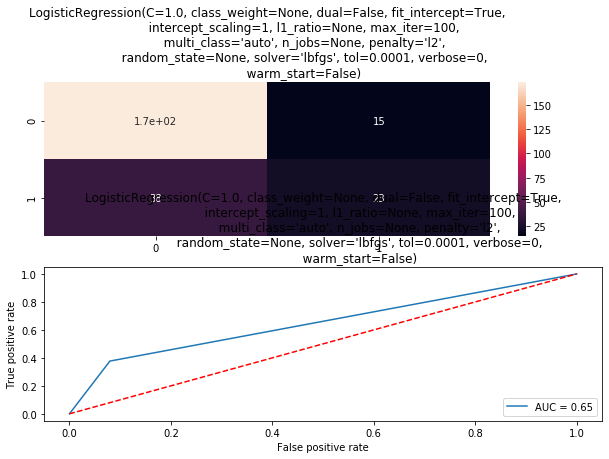

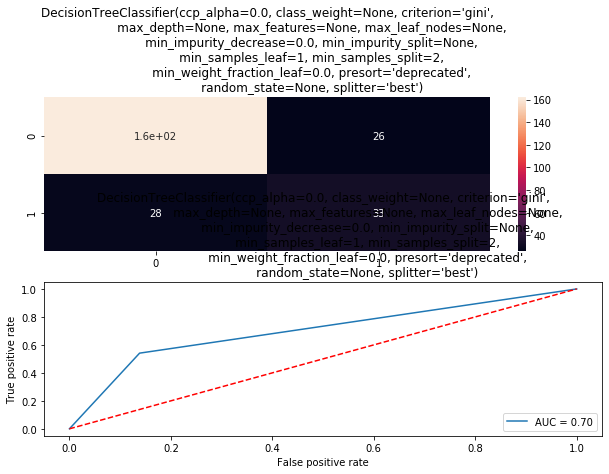

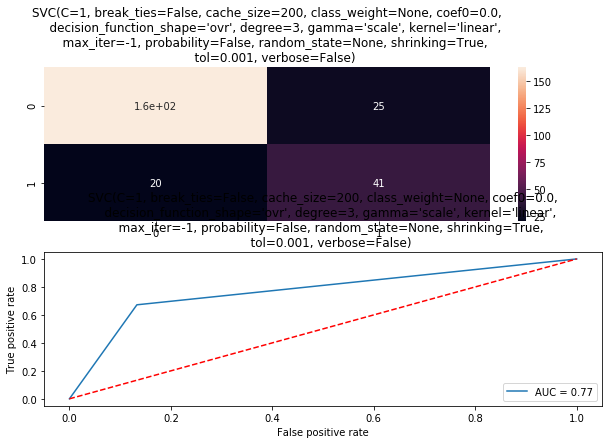

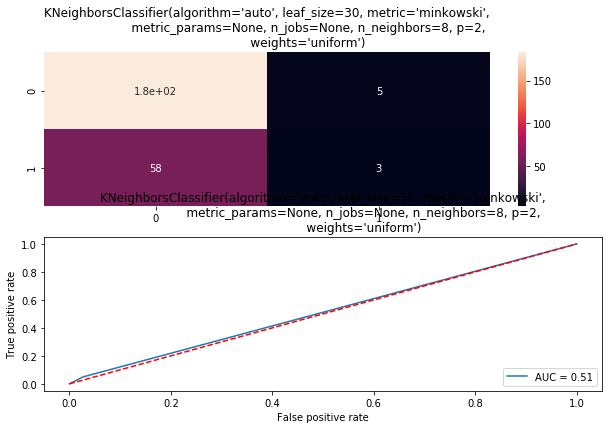

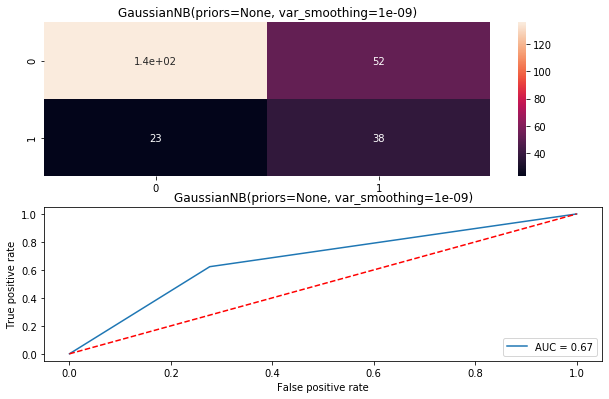

In [83]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LogisticRegression(penalty='l2'),DecisionTreeClassifier(criterion='gini'),SVC(C=1,kernel='linear'),KNeighborsClassifier(n_neighbors=8),GaussianNB()]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    acc_score=accuracy_score(y_test,prediction)
    print("ACCURACY_SCORE =",acc_score)
    score.append(acc_score*100)
    print("\n")
    cv_score=cross_val_score(models,x,y,cv=10, scoring='accuracy').mean()
    print("CROSS_VAL_SCORE =",cv_score)
    cvs.append(cv_score*100)
    print("\n")
    false_positive_rate, true_positive_rate,  thresholds=roc_curve(y_test,prediction)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_SCORE =",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print(" \n Classification Report \n ",classification_report(y_test,prediction))
    print("\n")
    cm=confusion_matrix(y_test,prediction)
    print(cm)
    print("\n") 
    plt.figure(figsize=(10,30))
    plt.subplot(911)
    plt.title(models)
    print(sns.heatmap(cm,annot=True))   
    plt.subplot(912)
    plt.title(models)      
    plt.plot(false_positive_rate, true_positive_rate, label= "AUC = %0.2f" % roc_auc)
    plt.plot([0,1],[0,1],'r--') 
    plt.legend(loc='lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n \n \n")
          

    

In [84]:
#Hence it is observed that svc is giving a good result, therefore finalizing it

In [85]:
svc=SVC(C=1, kernel='linear')
svc.fit(x_train,y_train)
prediction=svc.predict(x_test)
acc_score=accuracy_score(prediction,y_test)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.8192771084337349
The Cross Val Score = 0.7929648241206031


In [88]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(base_estimator=svc, n_estimators=500,random_state=0,algorithm='SAMME')
ada.fit(x_train,y_train)
print(ada.score(x_train,y_train))
pred=ada.predict(x_test)
print("Predicted result",pred)
print("\n \n")
print("Actual Result \n",y_test)

acc_score=accuracy_score(y_test,pred)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(lrg,x,y,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

0.7560321715817694
Predicted result [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]

 

Actual Result 
 129    1.0
830    0.0
78     0.0
568    0.0
864    0.0
      ... 
241    1.0
904    0.0
168    0.0
778    0.0
637    0.0
Name: fraud_reported, Length: 249, dtype: float64
Accuracy Score

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=0)
gbc.fit(x_train,y_train)
print(gbc.score(x_train,y_train))
gbcpred=gbc.predict(x_test)
acc_score=accuracy_score(y_test,gbcpred)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(gbc,x,y,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

0.9638069705093834
Accuracy Score = 0.8232931726907631
The Cross Val Score = 0.8262424242424243


In [92]:
from sklearn.externals import joblib
joblib.dump(gbc,"gbc_insurance_fraud.pkl")

['gbc_insurance_fraud.pkl']